In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'svg'

In [2]:
dataset= pd.read_csv('Zomato_Chennai_Dataset.csv')
dataset

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...,...,...
12027,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Porur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12028,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Kolathur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12029,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Anna Nagar East,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12030,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Ramapuram,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"


# Getting Basic Information about the Dataset

In [3]:
dataset.shape

(12032, 12)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          6681 non-null   float64
 8   Dining Rating Count    11812 non-null  object 
 9   Delivery Rating        6181 non-null   float64
 10  Delivery Rating Count  11812 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


In [5]:
dataset.describe()

,Price for 2,Dining Rating,Delivery Rating
count,12032.000000,6681.000000,6181.000000
mean,397.611370,3.387756,3.805290
std,332.045938,0.558181,0.374213
min,40.000000,0.300000,0.300000
25%,200.000000,3.100000,3.600000
50%,300.000000,3.500000,3.900000
75%,450.000000,3.800000,4.000000
max,5000.000000,4.900000,4.700000


# Dataset Cleaning

### 1. Removing the redundunt rows of data
### 2. Removing the Null Records
### 3. Converting the DataTypes of numerical columns to numeric dataype
### 4.  Removing the restaurant records whose Dining Rating  0
### 5. Working on 'LOCATION' Column
### 6. Removing Duplicate records

In [6]:
# 1. Removing the redundunt rows of data

# Checking redundunt rows of data

wrong_data= dataset['Cuisine']=='Cuisine'
dataset[wrong_data]

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features


In [7]:
# Performing Negation of the wrong dataset and then storing the correct data back in the dataset DataFrame
# This permamnently remove the wrong data from the original dataframe

dataset= dataset[~wrong_data]
dataset

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...,...,...
12027,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Porur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12028,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Kolathur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12029,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Anna Nagar East,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12030,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Ramapuram,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"


In [8]:
# Dropping columns which are not required for further analysis

dataset.drop(['Zomato URL', 'Address'], axis =1, inplace =True)
dataset

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12028,CK's Sandwiches,Kolathur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12029,CK's Sandwiches,Anna Nagar East,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12030,CK's Sandwiches,Ramapuram,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"


In [9]:
# 2. Removing the Null Records

#Checking for Null records

dataset.isnull().sum()

Name of Restaurant          0
Location                    0
Cuisine                     0
Top Dishes                  0
Price for 2                 0
Dining Rating            5351
Dining Rating Count       220
Delivery Rating          5851
Delivery Rating Count     220
Features                    0
dtype: int64

In [10]:
# Checking for a null row

dataset[dataset['Dining Rating'].isnull()]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
6,Bai Veetu Kalyanam,Navallur,['Biryani'],"['Bread Halwa', ' Mutton Biryani', ' Brinjal G...",350.0,NaN,Does not offer Dining,4.3,1061,['Home Delivery']
77,Al Dhareeq Beef Biriyani,Kodambakkam,['Biryani'],['Beef Biryani'],300.0,NaN,Does not offer Dining,3.9,19600,['Home Delivery']
106,Twilight Take Out,Nungambakkam,"['North Indian', ' Chinese', ' Rolls', ' Conti...","['Club Sandwich', ' Chicken Tikka Roll', ' Chi...",350.0,NaN,Does not offer Dining,4.0,11200,"['Home Delivery', 'Free Parking']"
107,The Red Box,Anna Nagar West,['Chinese'],"['Noodle', ' Chilli Chicken Gravy', ' Dragon C...",200.0,NaN,Does not offer Dining,4.2,11500,['Home Delivery']
114,Charminar Biriyani Centre,Royapettah,"['Biryani', ' North Indian']","['Chicken Biryani', ' Bread Halwa', ' Brinjal ...",300.0,NaN,Does not offer Dining,3.9,652,"['Home Delivery', 'Standing Tables']"
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12028,CK's Sandwiches,Kolathur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12029,CK's Sandwiches,Anna Nagar East,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12030,CK's Sandwiches,Ramapuram,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"


In [11]:
# 3. Converting the DataTypes of numerical columns to numeric dataype


# Checking for text values in the numerical column before converting it to numeric datatype

dataset[('Dining Rating Count')].value_counts()

Dining Rating Count
Does not offer Dining        2603
Not enough Dining Reviews    2528
4                             339
5                             271
6                             248
                             ... 
877                             1
897                             1
872                             1
1197                            1
224                             1
Name: count, Length: 793, dtype: int64

In [12]:
# Replacing the text values with '0'
dataset['Dining Rating Count'].replace(to_replace=['Does not offer Dining','Not enough Dining Reviews'], value = '0', inplace= True)
dataset

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12028,CK's Sandwiches,Kolathur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12029,CK's Sandwiches,Anna Nagar East,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12030,CK's Sandwiches,Ramapuram,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"


In [13]:
# 3. Checking for text values in the numerical column before converting it to numeric datatype

dataset['Delivery Rating Count'].value_counts()

Delivery Rating Count
Not enough Delivery Reviews    3379
Does not offer Delivery        2252
27                               34
32                               30
22                               30
                               ... 
7705                              1
6374                              1
1773                              1
3677                              1
1617                              1
Name: count, Length: 2281, dtype: int64

In [14]:
# Replacing the text values with '0'

dataset['Delivery Rating Count'].replace(to_replace=['Not enough Delivery Reviews','Does not offer Delivery'], value = '0', inplace= True)
dataset

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12028,CK's Sandwiches,Kolathur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12029,CK's Sandwiches,Anna Nagar East,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12030,CK's Sandwiches,Ramapuram,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"


In [15]:
dataset.fillna(0, inplace=True)
dataset

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,['Sandwich'],Invalid,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"
12028,CK's Sandwiches,Kolathur,['Sandwich'],Invalid,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"
12029,CK's Sandwiches,Anna Nagar East,['Sandwich'],Invalid,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"
12030,CK's Sandwiches,Ramapuram,['Sandwich'],Invalid,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"


In [16]:
# Changing Data Type of the numerical columns

dataset['Dining Rating Count']= dataset['Dining Rating Count'].astype('int64')
dataset['Delivery Rating Count']=dataset['Delivery Rating Count'].astype('int64')

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name of Restaurant     12032 non-null  object 
 1   Location               12032 non-null  object 
 2   Cuisine                12032 non-null  object 
 3   Top Dishes             12032 non-null  object 
 4   Price for 2            12032 non-null  float64
 5   Dining Rating          12032 non-null  float64
 6   Dining Rating Count    12032 non-null  int64  
 7   Delivery Rating        12032 non-null  float64
 8   Delivery Rating Count  12032 non-null  int64  
 9   Features               12032 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 940.1+ KB


In [18]:
columns_to_clean = ['Cuisine', 'Top Dishes', 'Features']

for column in columns_to_clean:
    dataset[column] = dataset[column].str.replace(r"[\[\]']", '', regex=True)
dataset.head()


,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",500.0,4.3,1500,4.3,9306,"Home Delivery, Indoor Seating"
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000.0,4.4,3059,4.1,39200,"Home Delivery, Free Parking, Table booking rec..."
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500.0,4.3,1361,4.4,10500,"Home Delivery, Indoor Seating"
3,KFC,Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,500.0,4.0,1101,4.0,11200,"Home Delivery, Free Parking, Card Upon Deliver..."
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450.0,4.2,617,4.1,22400,"Home Delivery, Indoor Seating"


In [19]:
# Checking for Null records

dataset.isnull().sum()

Name of Restaurant       0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

In [20]:
# Replacing the Null values with 'NA'
    
dataset.fillna('NA', inplace= True)

# Checking info of all the columns

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name of Restaurant     12032 non-null  object 
 1   Location               12032 non-null  object 
 2   Cuisine                12032 non-null  object 
 3   Top Dishes             12032 non-null  object 
 4   Price for 2            12032 non-null  float64
 5   Dining Rating          12032 non-null  float64
 6   Dining Rating Count    12032 non-null  int64  
 7   Delivery Rating        12032 non-null  float64
 8   Delivery Rating Count  12032 non-null  int64  
 9   Features               12032 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 940.1+ KB


In [21]:
# 4.Removing the restaurant records whose Dining Rating is 0

remove_data= (dataset['Dining Rating']==0.0)| (dataset['Delivery Rating']==0.0)
dataset[remove_data]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
6,Bai Veetu Kalyanam,Navallur,Biryani,"Bread Halwa, Mutton Biryani, Brinjal Gravy, ...",350.0,0.0,0,4.3,1061,Home Delivery
15,Welcome Hotel,Purasavakkam,"South Indian, Desserts, Beverages","Pongal, Podi Dosa, Idli Sambar, Vada Curry,...",300.0,4.5,1094,0.0,0,"Breakfast, Vegetarian Only, Indoor Seating"
18,Wire Room Bar & Kitchen,"Phoenix Market City, Velachery","Continental, Asian","Cocktails, Salad, Beer, Tikka, Pork Ribs, ...",2000.0,4.1,354,0.0,0,"Full Bar Available, Mall Parking, Dance Floor,..."
23,BFF 2.0,RA Puram,"North Indian, Continental, Italian","Crispy Chicken, Cocktails, Pizza, Nachos, ...",1500.0,4.2,464,0.0,0,"Full Bar Available, Indoor Seating, Nightlife,..."
77,Al Dhareeq Beef Biriyani,Kodambakkam,Biryani,Beef Biryani,300.0,0.0,0,3.9,19600,Home Delivery
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,Sandwich,Invalid,350.0,0.0,0,0.0,0,"Breakfast, Delivery Only"
12028,CK's Sandwiches,Kolathur,Sandwich,Invalid,350.0,0.0,0,0.0,0,"Breakfast, Delivery Only"
12029,CK's Sandwiches,Anna Nagar East,Sandwich,Invalid,350.0,0.0,0,0.0,0,"Breakfast, Delivery Only"
12030,CK's Sandwiches,Ramapuram,Sandwich,Invalid,350.0,0.0,0,0.0,0,"Breakfast, Delivery Only"


In [22]:
#Performing Negation of the useless dataset and then storing the correct data back in the raw_df DataFrame
#This permamnently remove the wrong data from the original dataframe

dataset=dataset[~remove_data]
dataset

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",500.0,4.3,1500,4.3,9306,"Home Delivery, Indoor Seating"
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000.0,4.4,3059,4.1,39200,"Home Delivery, Free Parking, Table booking rec..."
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500.0,4.3,1361,4.4,10500,"Home Delivery, Indoor Seating"
3,KFC,Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,500.0,4.0,1101,4.0,11200,"Home Delivery, Free Parking, Card Upon Deliver..."
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450.0,4.2,617,4.1,22400,"Home Delivery, Indoor Seating"
...,...,...,...,...,...,...,...,...,...,...
11666,Juice World,Alandur,"Beverages, Fast Food",Invalid,300.0,2.0,4,3.9,42,"Home Delivery, Vegetarian Only, Indoor Seating"
11667,Juice World,Palavakkam,"Beverages, Fast Food",Invalid,300.0,2.0,4,3.9,48,"Home Delivery, Vegetarian Only, Indoor Seating"
11736,Adyar Vaishnavas Thattu Idly Kadai,Porur,"South Indian, Sandwich, Chinese, Street Food",Invalid,200.0,3.2,6,3.9,48,"Home Delivery, Indoor Seating"
11785,Engineers Kitchen,Ambattur,"North Indian, Chinese, Andhra",Invalid,400.0,2.5,6,3.5,214,"Home Delivery, Indoor Seating"


In [23]:
# 5. Working on 'Location' Column

dataset['Location'].value_counts()

Location
Porur                                      148
Anna Nagar East                            146
Velachery                                  145
Ambattur                                   124
T. Nagar                                   119
                                          ... 
Holiday Inn Chennai OMR IT Expressway        1
Chennai Food Town, Thuraipakkam              1
Foodies Kitchen                              1
Hotel Bhimaas, Vadapalani                    1
Spectrum The Grand Venus Mall, Perambur      1
Name: count, Length: 161, dtype: int64

### Replacing Strings with comma in location column by last string

In [24]:
# Specify the column to process
column_to_process = 'Location'

# Replace strings containing commas with the last string
dataset[column_to_process] = dataset[column_to_process].str.split(',').str[-1]
dataset.head()

/var/folders/07/ykgp85052b11h5kz22ghn8l40000gn/T/ipykernel_80837/3588506736.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",500.0,4.3,1500,4.3,9306,"Home Delivery, Indoor Seating"
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000.0,4.4,3059,4.1,39200,"Home Delivery, Free Parking, Table booking rec..."
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500.0,4.3,1361,4.4,10500,"Home Delivery, Indoor Seating"
3,KFC,Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,500.0,4.0,1101,4.0,11200,"Home Delivery, Free Parking, Card Upon Deliver..."
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450.0,4.2,617,4.1,22400,"Home Delivery, Indoor Seating"


### Invalid count in Top dishes

In [25]:
# Specify the string to count
string_to_count = 'Invalid'

# Using value_counts() method
count_using_value_counts = (dataset['Top Dishes'] == string_to_count).sum()

# Using boolean indexing
count_using_boolean_indexing = (dataset['Top Dishes'] == string_to_count).sum()

# Display the counts
print(f"Count using value_counts: {count_using_value_counts}")
print(f"Count using boolean indexing: {count_using_boolean_indexing}")

Count using value_counts: 2703
Count using boolean indexing: 2703


In [26]:
# 6. Removing Duplicate records

# Finding all the duplicate rows

dataset[dataset.duplicated()]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features


In [27]:
# Dropping all the duplicate rows

dataset=dataset.drop_duplicates()

#  Copying the cleaned data into a new DataFrame

In [28]:
PPCZ_dataset=dataset.copy()
PPCZ_dataset

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",500.0,4.3,1500,4.3,9306,"Home Delivery, Indoor Seating"
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000.0,4.4,3059,4.1,39200,"Home Delivery, Free Parking, Table booking rec..."
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500.0,4.3,1361,4.4,10500,"Home Delivery, Indoor Seating"
3,KFC,Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,500.0,4.0,1101,4.0,11200,"Home Delivery, Free Parking, Card Upon Deliver..."
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450.0,4.2,617,4.1,22400,"Home Delivery, Indoor Seating"
...,...,...,...,...,...,...,...,...,...,...
11666,Juice World,Alandur,"Beverages, Fast Food",Invalid,300.0,2.0,4,3.9,42,"Home Delivery, Vegetarian Only, Indoor Seating"
11667,Juice World,Palavakkam,"Beverages, Fast Food",Invalid,300.0,2.0,4,3.9,48,"Home Delivery, Vegetarian Only, Indoor Seating"
11736,Adyar Vaishnavas Thattu Idly Kadai,Porur,"South Indian, Sandwich, Chinese, Street Food",Invalid,200.0,3.2,6,3.9,48,"Home Delivery, Indoor Seating"
11785,Engineers Kitchen,Ambattur,"North Indian, Chinese, Andhra",Invalid,400.0,2.5,6,3.5,214,"Home Delivery, Indoor Seating"


# Performing Exploratory Data Analysis

### Q1)Give the count of top 10 cuisines in Chennai.

In [29]:
# Count the number of each cuisine
cuisine_counts = PPCZ_dataset['Cuisine'].value_counts()

# Select the top N most common cuisines
top_n = 10  # Adjust N as needed
top_cuisines = cuisine_counts.head(top_n)
top_cuisines

Cuisine
South Indian              163
Pizza,  Fast Food          97
North Indian,  Chinese     89
Fast Food                  83
South Indian,  Chinese     73
Burger,  Fast Food         68
Beverages,  Fast Food      56
Biryani                    55
Bakery,  Desserts          53
Bakery                     52
Name: count, dtype: int64

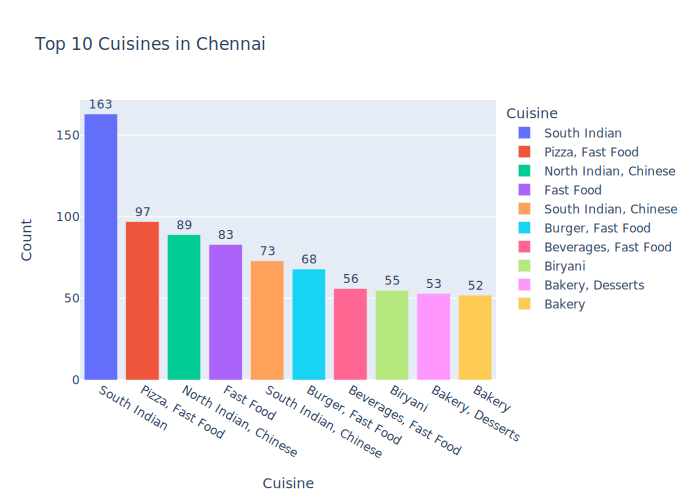

In [30]:

# Create a bar chart
fig = px.bar(top_cuisines, x=top_cuisines.index, y=top_cuisines.values, labels={'x': 'Cuisine', 'y': 'Count'},title=f'Top {top_n} Cuisines in Chennai', color=top_cuisines.index,text=top_cuisines.values)

#Customize the text display on the bars
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.show()

### Q2) What is the percentage of restaurants by Dining Rating in Chennai?

In [31]:
rating_type = PPCZ_dataset['Dining Rating'].value_counts().reset_index()
rating_type.columns = ['Dining Rating', 'Count of Restaurants']
rating_type['PERCENTAGE'] = (rating_type['Count of Restaurants'] / rating_type['Count of Restaurants'].sum()) * 100
rating_type

,Dining Rating,Count of Restaurants,PERCENTAGE
0,3.7,387,8.833600
1,3.6,377,8.605341
2,3.5,359,8.194476
3,3.8,334,7.623830
4,3.4,324,7.395572
5,3.9,301,6.870577
6,3.3,294,6.710797
7,3.2,262,5.980370
8,3.1,236,5.386898
9,4.0,222,5.067336


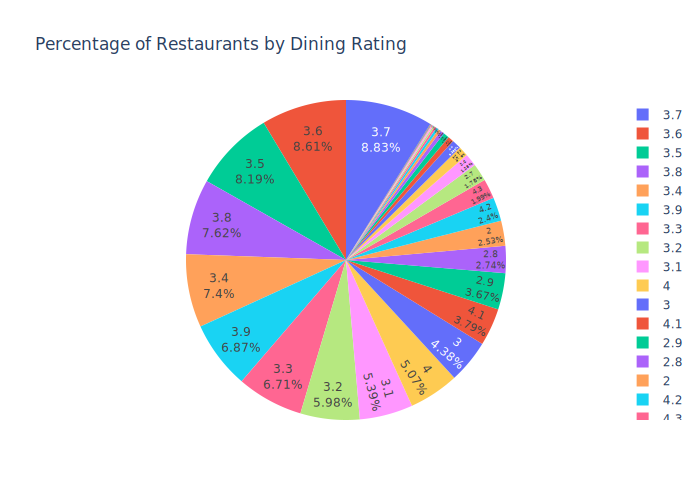

In [32]:
fig=px.pie(rating_type, names = 'Dining Rating', values = 'Count of Restaurants', color = 'Dining Rating',
          title= 'Percentage of Restaurants by Dining Rating').update_traces(textposition='inside',textinfo='percent+label')
fig.show()

### Q3) Which are the Top 10 highest rated South Indian (SI) Restaurants in Chennai?

In [33]:
si_restaurant=  PPCZ_dataset[ PPCZ_dataset['Cuisine'].str.contains('South Indian')]
si_restaurant=si_restaurant.sort_values(by='Dining Rating',ascending=False).head(10)

# Creating table
table = si_restaurant[['Name of Restaurant', 'Cuisine', 'Dining Rating']]
table

,Name of Restaurant,Cuisine,Dining Rating
219,Prems Graama Bhojanam,South Indian,4.9
184,Gossip Fusion Bistro,"Italian, Continental, Burger, Sandwich, Wr...",4.9
108,Rayar's Mess,South Indian,4.7
24,Eating Circles,South Indian,4.7
50,Andhikkadai,South Indian,4.6
270,ID,South Indian,4.5
9273,Ratna Cafe,"South Indian, Chinese, Street Food, Beverages",4.5
110,VB Signature,"North Indian, South Indian, Chinese, Asian,...",4.5
394,Savya Rasa,"Chettinad, Andhra, Kerala, Mangalorean, So...",4.4
357,Bharat Bistro,"North Indian, South Indian, Bengali, Mahara...",4.4


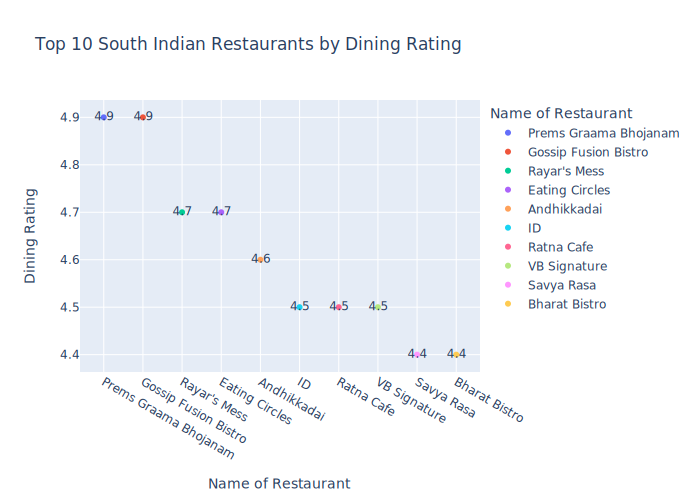

In [34]:
# Create a scatter plot using Plotly

fig = px.scatter(si_restaurant, x='Name of Restaurant', y='Dining Rating', title='Top 10 South Indian Restaurants by Dining Rating', color='Name of Restaurant', text='Dining Rating')

# Customize the appearance of the plot
fig.update_layout(xaxis_title='Name of Restaurant', yaxis_title='Dining Rating')

fig.show()

### Q4) Which are the best home delivery feature restaurant in Chennai?

In [35]:
# Filter for restaurants offering home delivery and having multiple delivery types
multi_delivery_data = PPCZ_dataset[(PPCZ_dataset['Features'].str.contains('Home Delivery')) & (PPCZ_dataset['Features'].str.len() > 1)]

# Sort by delivery rating in descending order
sorted_multi_delivery_data = multi_delivery_data.sort_values(by='Delivery Rating', ascending=False).head(5)

# Print the top restaurant with the highest delivery rating among those offering multiple delivery types
best_hd_restaurant = sorted_multi_delivery_data.iloc[0]

#best_hd_restaurant
sorted_multi_delivery_data

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
4371,Mumbai Kulfi,Pallavaram,Desserts,Invalid,150.0,3.7,11,4.7,141,"Home Delivery, Free Parking, Outdoor Seating, ..."
1985,Arabian Plate,Adambakkam,"Arabian, Biryani",Invalid,300.0,3.7,58,4.7,491,"Home Delivery, Indoor Seating"
9977,ibaco,Mylapore,Ice Cream,Brownie,200.0,3.6,55,4.7,230,"Home Delivery, Vegetarian Only, Desserts and B..."
9985,ibaco,Anna Nagar East,Ice Cream,Invalid,200.0,3.7,57,4.6,391,"Home Delivery, Vegetarian Only, Indoor Seating..."
9545,Bombay Kulfi,Kottivakkam,Ice Cream,Invalid,200.0,3.3,6,4.6,114,"Home Delivery, Outdoor Seating, Sugar Free Opt..."


### Q5) Which places have the highest rated restaurant for each Cuisine in Chennai?

In [36]:
high_rated_restaurants = PPCZ_dataset[PPCZ_dataset['Dining Rating'] >= 4.5]

# Sort the filtered data in descending order based on 'Dining Rating'
high_rated_restaurants = high_rated_restaurants.sort_values(by='Dining Rating', ascending=False)

# Select the columns you want
table = high_rated_restaurants[['Name of Restaurant', 'Location', 'Cuisine', 'Dining Rating']]
table

,Name of Restaurant,Location,Cuisine,Dining Rating
192,Kabab Corner,Egmore,"Kebab, Rolls, Mughlai",4.9
105,Bhangra,Kanathur,North Indian,4.9
320,Bombay Kulfi,Adyar,Ice Cream,4.9
57,Brownie Heaven,Royapettah,"Bakery, Desserts, Beverages",4.9
219,Prems Graama Bhojanam,Adyar,South Indian,4.9
184,Gossip Fusion Bistro,Kanathur,"Italian, Continental, Burger, Sandwich, Wr...",4.9
155,The Sandwich Shop,West Mambalam,"Sandwich, Fast Food, Beverages",4.9
62,Amadora Gourmet Ice Cream & Sorbet,Nungambakkam,"Desserts, Ice Cream",4.8
195,The Marina,Nungambakkam,"Seafood, North Indian, Chinese",4.8
163,Momo Sa-Khang by Kailash Kitchen,Choolaimedu,"Momos, Chinese",4.8


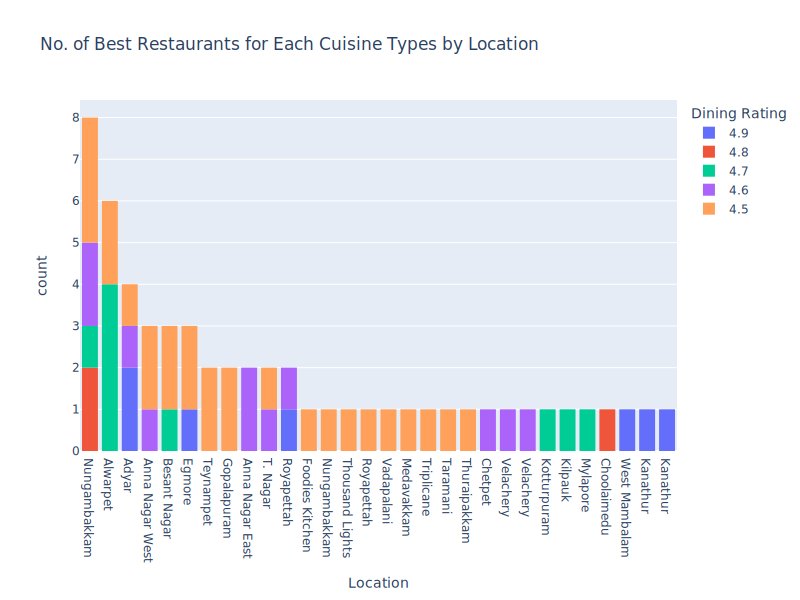

In [37]:
fig=px.histogram(high_rated_restaurants,x='Location',color='Dining Rating',
                title= 'No. of Best Restaurants for Each Cuisine Types by Location').update_xaxes(categoryorder='total descending')
fig.update_layout(
    autosize=False,
    width=800,  # Adjust this value as needed
    height=600,  # Adjust this value as needed
)

fig.show()

### Q6) What is the Avg Price Distibution of highest rated restaurant for each Cuisine Type in Chennai?

In [38]:
avrg_price=high_rated_restaurants.groupby(by=['Location','Cuisine'])['Price for 2'].mean().reset_index()
avrg_price.columns = ['Location','Cuisine','Mean Price for 2']
avrg_price.head()

,Location,Cuisine,Mean Price for 2
0,Kanathur,North Indian,800.0
1,Nungambakkam,"Momos, Asian, Chinese, Sushi",1800.0
2,Royapettah,South Indian,300.0
3,Velachery,"Chinese, Asian, Sushi, Japanese, Thai",1800.0
4,Adyar,"Chinese, Thai",800.0


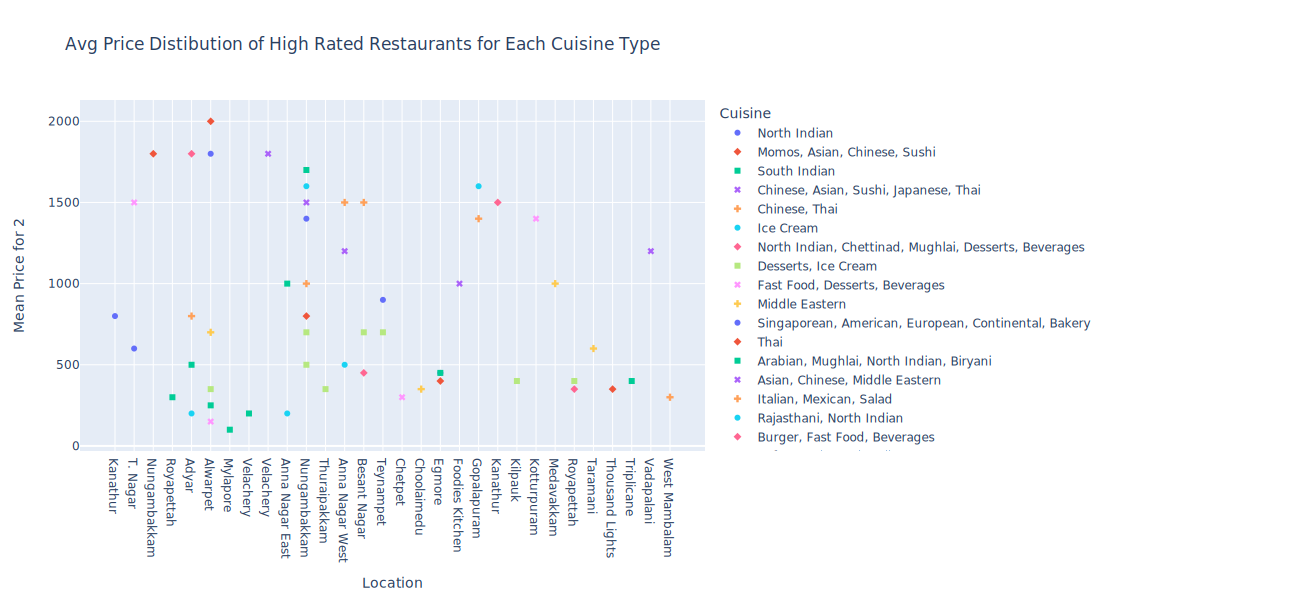

In [39]:
fig=px.scatter(avrg_price , x= 'Location',y='Mean Price for 2', color='Cuisine',symbol = 'Cuisine',
              title= 'Avg Price Distibution of High Rated Restaurants for Each Cuisine Type').update_traces(marker_size = 6)
fig.update_layout(
    autosize=False,
    width=1300,  # Adjust this value as needed
    height=600,  # Adjust this value as needed
)
fig.show()

### Q7) Which areas have a large number of Chinese Restaurant Market?

In [40]:
cr=PPCZ_dataset[PPCZ_dataset['Cuisine'].str.contains('Chinese')]
cr

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500.0,4.3,1361,4.4,10500,"Home Delivery, Indoor Seating"
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450.0,4.2,617,4.1,22400,"Home Delivery, Indoor Seating"
5,Dine N Fun,Medavakkam,"South Indian, North Indian, Chinese","Chicken Grill, Shawarma, Naan, Chicken Butt...",450.0,4.1,567,3.8,24700,"Home Delivery, Indoor Seating"
8,Savoury Sea Shell,Anna Nagar East,"Arabian, Chinese, North Indian, Lebanese, ...","Shawarma, Chicken Grill, Brownie, Sea Food,...",1400.0,4.2,2564,4.1,21700,"Home Delivery, Indoor Seating, Card Upon Deliv..."
9,Sangeetha Veg Restaurant,T. Nagar,"South Indian, North Indian, Chinese, Chetti...","Filtered Coffee, Chaat, Faluda, Masala Dosa...",800.0,4.4,1578,4.2,39600,"Breakfast, Home Delivery, Vegetarian Only, Ind..."
...,...,...,...,...,...,...,...,...,...,...
11382,Texas Treat,Selaiyur,"Bakery, North Indian, Chinese, Italian, Me...",Invalid,850.0,3.8,9,3.8,43,"Home Delivery, Vegetarian Only, Free Parking, ..."
11544,Anandhi Idly Kadai,Medavakkam,"South Indian, Chinese",Invalid,200.0,3.4,24,4.1,778,"Home Delivery, Indoor Seating"
11545,Anandhi Idly Kadai,Selaiyur,"South Indian, Chinese",Invalid,200.0,3.1,17,4.1,367,"Breakfast, Home Delivery, Indoor Seating"
11736,Adyar Vaishnavas Thattu Idly Kadai,Porur,"South Indian, Sandwich, Chinese, Street Food",Invalid,200.0,3.2,6,3.9,48,"Home Delivery, Indoor Seating"


In [41]:
crc = cr.groupby(by='Location').agg({'Name of Restaurant':'count', 'Price for 2':'mean'})
crc.rename(columns={'Name of Restaurant':'Chinese Restaurant Count', 'Price for 2':'Mean Price'}, inplace=True)
crc=crc.sort_values('Chinese Restaurant Count',ascending=False).head(25)
crc

,Chinese Restaurant Count,Mean Price
Location,,
Porur,58,490.517241
Anna Nagar East,57,638.596491
Ambattur,52,415.384615
T. Nagar,47,501.063830
Velachery,46,576.086957
Kolathur,45,448.888889
Perambur,45,476.666667
Ramapuram,43,445.348837
Medavakkam,42,530.952381


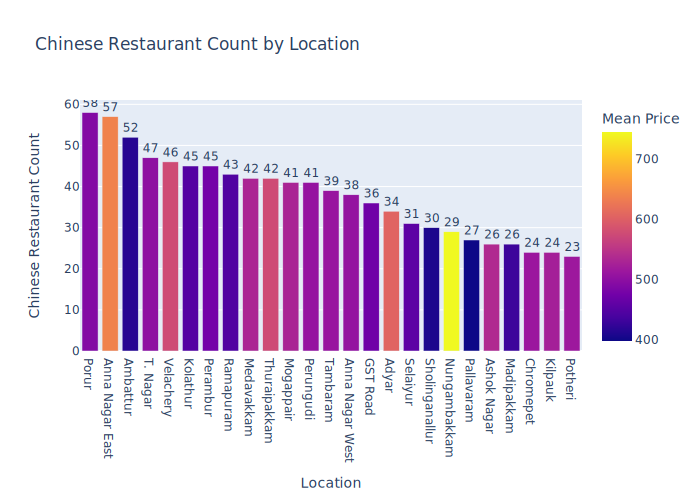

In [42]:
# Create a bar chart
fig = px.bar(crc, x=crc.index, y='Chinese Restaurant Count', labels={'x': 'Location', 'y': 'Chinese Restaurant Count'},title=f'Chinese Restaurant Count by Location', color='Mean Price',text='Chinese Restaurant Count')

#Customize the text display on the bars
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.show()

### Q8) Is there a relation between Price and Dining Rating by Top Dishes ?

In [43]:
correlation = PPCZ_dataset.groupby('Top Dishes')[['Price for 2', 'Dining Rating']].corr().iloc[0::2, -1]
correlation

Top Dishes                                                                                       
Aloo Paratha                                                                          Price for 2   NaN
Aloo Paratha,  Rasgulla,  Egg Bhurji,  Roti                                           Price for 2   NaN
Aloo Paratha,  Samosa,  Palak Paneer                                                  Price for 2   NaN
Aloo Patty,  Sandwich,  Salad,  Chocolate Cookies                                     Price for 2   NaN
Aloo Tikki,  Naan,  Roti,  Momos,  Paneer Tikka,  Tomato Soup,  Panner Tikka          Price for 2   NaN
                                                                                                     ..
White Pasta,  Iced Tea,  Maggi,  Cheese Chilli Toast,  Garlic Bread                   Price for 2   NaN
Wood Fire Pizza                                                                       Price for 2   NaN
Wood Fire Pizza,  Fries,  Iced Tea,  Thin Crust Pizza,  Garlic Bread, 

In [44]:
pr=PPCZ_dataset.groupby(['Top Dishes','Dining Rating'])["Price for 2"].mean().reset_index()
pr

,Top Dishes,Dining Rating,Price for 2
0,Aloo Paratha,3.0,300.0
1,"Aloo Paratha, Rasgulla, Egg Bhurji, Roti",3.1,300.0
2,"Aloo Paratha, Samosa, Palak Paneer",3.6,300.0
3,"Aloo Patty, Sandwich, Salad, Chocolate Cookies",3.5,500.0
4,"Aloo Tikki, Naan, Roti, Momos, Paneer Tikk...",3.8,800.0
...,...,...,...
1668,"White Pasta, Iced Tea, Maggi, Cheese Chilli...",3.3,700.0
1669,Wood Fire Pizza,4.0,650.0
1670,"Wood Fire Pizza, Fries, Iced Tea, Thin Crus...",3.3,600.0
1671,"Yellow Rice, Fish, Butter Chicken, Lunch Bu...",3.7,800.0


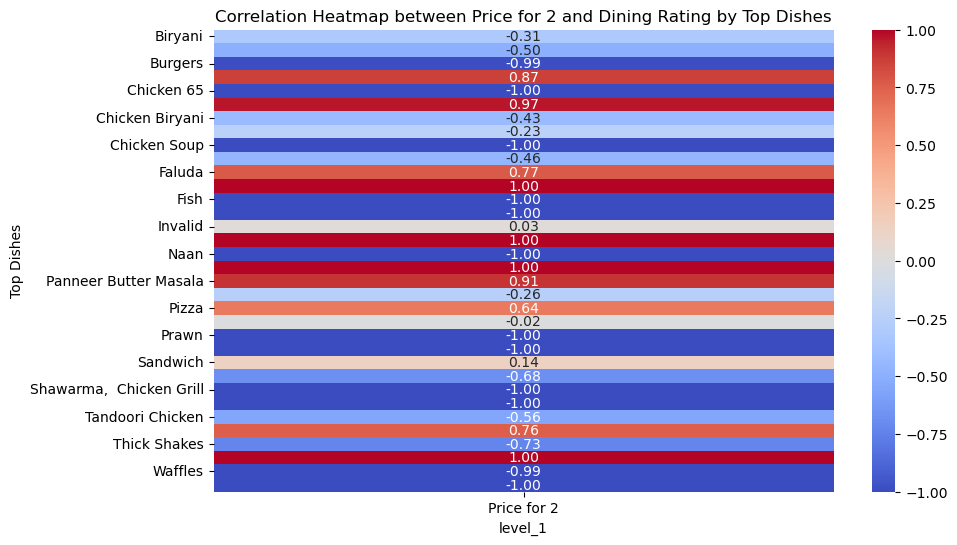

In [45]:
# Reset the index and create a pivot table
correlation = correlation.reset_index()
correlation_pivot = correlation.pivot_table(index='Top Dishes', columns='level_1', values='Dining Rating')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_pivot, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Price for 2 and Dining Rating by Top Dishes')
plt.show()

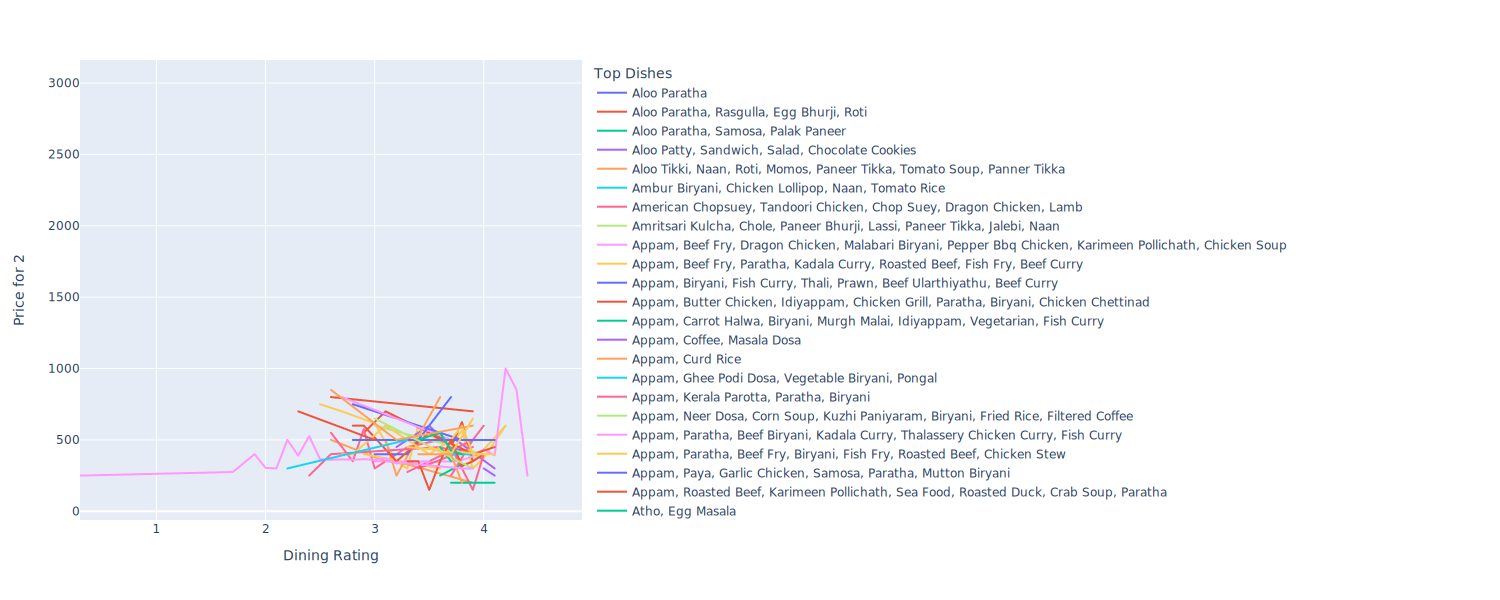

In [46]:
fig=px.line(pr,x='Dining Rating', y= 'Price for 2',color='Top Dishes')
fig.update_layout(
    autosize=False,
    width=1500,  # Adjust this value as needed
    height=600,  # Adjust this value as needed
)
fig.show()

### Q9) Is there a relation between Location and Price?

In [47]:
regprice=PPCZ_dataset.groupby(['Location'])["Price for 2"].mean().reset_index()
regprice

,Location,Price for 2
0,Adyar,500.000000
1,Alwarpet,1150.000000
2,Ambattur,441.666667
3,Ambattur,300.000000
4,Aminijikarai,500.000000
...,...,...
142,Vepery,347.368421
143,Vettuvankeni,475.000000
144,Virugambakkam,422.000000
145,Washermenpet,380.555556


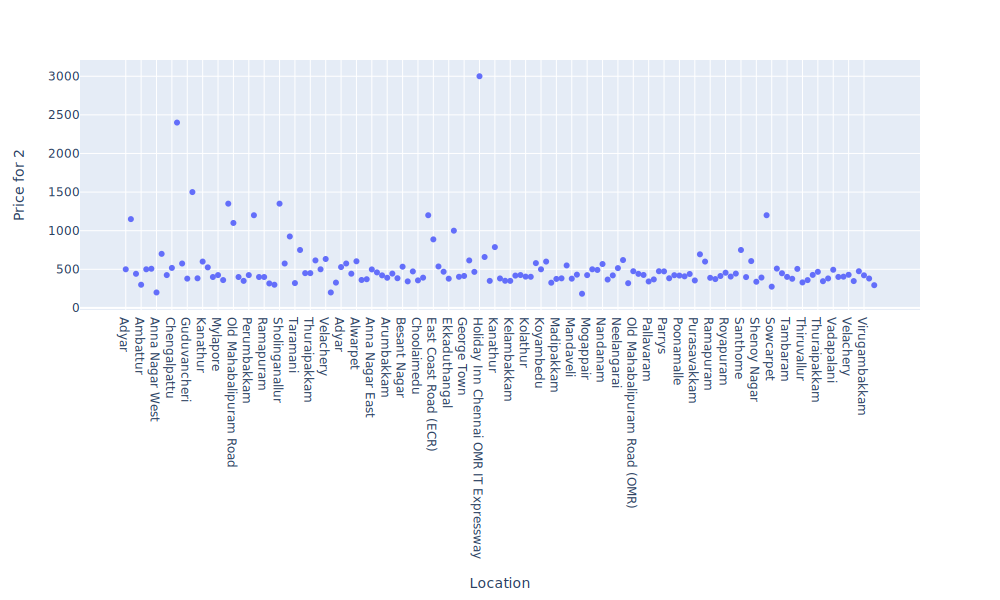

In [48]:
fig=px.scatter(regprice,x='Location', y='Price for 2').update_traces(marker_size=6)
fig.update_layout(
    autosize=False,
    width=1000,  # Adjust this value as needed
    height=600,  # Adjust this value as needed
)
fig.show()

### Q10) Find the list of Affordable Restaurants?

#### The criteria for Affordable Restaurants would be:-

#### 1) Low Price 2) High Rated

#### First step will be to find the restaurants with average cost 1/4th the average cost of most expensive restaurant in our dataframe.


In [49]:
max_price= PPCZ_dataset['Price for 2'].max()
quaterth_price=max_price/4
quaterth_price

750.0

In [50]:
# Finding list of restaurants that have price less than and equal to 1/4th of the max price i.e Finding Cheap Restaurant

aff_res=PPCZ_dataset[['Name of Restaurant','Price for 2','Cuisine','Location','Top Dishes']]
aff_res=aff_res[aff_res['Price for 2']<=750]
aff_res.sort_values(by='Price for 2',inplace = True)
aff_res

,Name of Restaurant,Price for 2,Cuisine,Location,Top Dishes
5547,Mylapore Filter Coffee,100.0,"Street Food, Beverages",Nungambakkam,Invalid
2151,Cane 4 U,100.0,Beverages,Besant Nagar,"Sugarcane Juice, Fruit Juices"
2511,Rose Milk Raja,100.0,Beverages,Maduravoyal,Invalid
1326,Madurai Famous Jigarthanda,100.0,"Beverages, Ice Cream",T. Nagar,Invalid
108,Rayar's Mess,100.0,South Indian,Mylapore,"Pongal, Vada, Filtered Coffee, Idli, Bonda..."
...,...,...,...,...,...
10071,Long Live Pizza,750.0,"Pizza, Fast Food",Guduvancheri,Invalid
9568,Ponnusamy Hotels,750.0,"Chettinad, South Indian, Chinese",Sholinganallur,"Fish Finger, Mutton Biryani, Butter Naan, T..."
9571,Ponnusamy Hotels,750.0,"Chettinad, South Indian, Chinese",Saidapet,"Fish Finger, Chicken 65, Chilli Chicken, Raita"
10074,Long Live Pizza,750.0,"Pizza, Fast Food",Injambakkam,Invalid


In [51]:
# Finding the high rated list of restaurants
    
highrate_res=PPCZ_dataset[['Name of Restaurant','Price for 2','Cuisine','Location','Top Dishes','Dining Rating']]
highrate_res=highrate_res[highrate_res['Dining Rating']>=4.5]
highrate_res.sort_values(by='Dining Rating',inplace = True)
highrate_res

,Name of Restaurant,Price for 2,Cuisine,Location,Top Dishes,Dining Rating
115,North East Kitchen,450.0,"Chinese, Konkan, Momos",Egmore,"Momos, Noodle, Pork Thali, Thukpa, Pork Cu...",4.5
214,Sera - The Tapas Bar & Restaurant,1600.0,"Finger Food, Seafood, Italian, Continental",Gopalapuram,"Cocktails, Pasta, Nachos, Mashed Potato, S...",4.5
209,Cream Stone,350.0,"Desserts, Ice Cream",Alwarpet,"Death By Chocolate, Ferrero Rocher, Waffles,...",4.5
207,Va Pho - Asian Canteen,1400.0,"Asian, Chinese, Beverages",Gopalapuram,"Noodle, Mocktails, Beef Sate, Momos, Falud...",4.5
270,ID,300.0,South Indian,Royapettah,"Filtered Coffee, Appam, Buttermilk, Sweet P...",4.5
9367,Cream Stone,350.0,"Desserts, Ice Cream",Thuraipakkam,"Death By Chocolate, Chocolava, Tiramisu, Ch...",4.5
284,Absolute Thai,1000.0,"Thai, Asian",Foodies Kitchen,"Tom Yum Soup, Tempura Prawns, Pad Thai Noodl...",4.5
289,Kuuraku,1200.0,Japanese,Vadapalani,"Ramen, Sushi, Tea, Yakitori Don, Tempura, ...",4.5
158,BurgerMan,450.0,"Burger, Fast Food, Beverages",Besant Nagar,"Burgers, Nachos, Chicken Burger, Thick Shak...",4.5
471,Shmoozie's Hand-Crafted Ice Creams,400.0,"Ice Cream, Desserts",Egmore,"Salted Caramel, Brownie, Bannoffee Pie, Cof...",4.5


In [52]:
# Merge aff_res & highrate_res to get Affordable Restaurants with low price and high rating

highrate_aff_res= pd.merge(aff_res,highrate_res,how='inner',on=['Name of Restaurant','Location'])
highrate_aff_res=highrate_aff_res[['Name of Restaurant','Price for 2_x','Cuisine_x','Location','Top Dishes_x']]
highrate_aff_res.rename(columns={'Name of Restaurant':'Name of Restaurant','Price for 2_x':'Price for 2','Cuisine_x':'Cuisine','Location':'Location','Top Dishes_x':'Top Dishes'},inplace=True)
highrate_aff_res

,Name of Restaurant,Price for 2,Cuisine,Location,Top Dishes
0,Rayar's Mess,100.0,South Indian,Mylapore,"Pongal, Vada, Filtered Coffee, Idli, Bonda..."
1,Royal Sandwich Shop,150.0,"Fast Food, Desserts, Beverages",Alwarpet,"Brownie, Cheese Masala Toast, Chocolate Sand..."
2,Royal Sandwich Shop,150.0,"Fast Food, Desserts, Beverages",Alwarpet,Invalid
3,Royal Sandwich Shop,150.0,"Fast Food, Desserts, Beverages",Alwarpet,Invalid
4,Andhikkadai,200.0,South Indian,Velachery,"Coffee, Sweet Kozhukattai, Idli, Pongal, K..."
5,Bombay Kulfi,200.0,Ice Cream,Anna Nagar East,"Calcutta Paan, Tender Coconut Kulfi, Paan Ic..."
6,Bombay Kulfi,200.0,Ice Cream,Adyar,"Kesar Pista Kulfi, Malai Kulfi, Chocolate Ku..."
7,Eating Circles,250.0,South Indian,Alwarpet,"Rose Milk, Neer Dosa, Thatte Idli, Open Mas..."
8,Shree Mithai,300.0,"Mithai, Street Food, Fast Food",Chetpet,"Chaat, Badam Milk, Pav Bhaji, Panipuri, Ra..."
9,ID,300.0,South Indian,Royapettah,"Filtered Coffee, Appam, Buttermilk, Sweet P..."


### Q11) Find the list of most Reliable Restaurants?

#### The criteria for Affordable Restaurants would be:-

#### 1) Low Price 2) High Rated 3)Large No. of Dining Rating Count

#### First two steps has been already carried out. So next step will be to  find the restaurants with Votes greater than Mean of Dining Rating Count.


In [53]:
mean_votes= PPCZ_dataset['Dining Rating Count'].mean()
mean_votes

168.96051129879024

In [54]:
# Finding list of restaurants that have Votes greater than and equal to Mean of Vote

mean_res=PPCZ_dataset[['Name of Restaurant','Price for 2','Cuisine','Location','Top Dishes','Dining Rating Count']]
mean_res=mean_res[mean_res['Dining Rating Count']>169]
mean_res.sort_values(by='Dining Rating Count',inplace = True)
mean_res

,Name of Restaurant,Price for 2,Cuisine,Location,Top Dishes,Dining Rating Count
1127,Kalpana Andhra Mess,350.0,"Andhra, Chinese, Biryani",Thuraipakkam,"Omelette, Mutton Curry, Andhra Meal, Mutton...",170
1070,Grill & Barbeque,400.0,"Arabian, Chinese, North Indian",Perambur,Invalid,170
949,Kebab It,500.0,"Kebab, Chinese, North Indian",Besant Nagar,"Rolls, Chicken Roll, Beef Fry, Shawarma, C...",170
769,The London Shakes & Chaat Chatore,500.0,"Cafe, Street Food, Italian, Beverages",Velachery,"Vada Pav, Chaat, Panipuri Shots, Maggi, Bh...",170
651,Nizam Palace,800.0,"Biryani, North Indian, Andhra, Chinese, Be...",Old Mahabalipuram Road (OMR),Invalid,170
...,...,...,...,...,...,...
9040,Palmshore,1000.0,"North Indian, Chinese, Arabian, BBQ, Birya...",Ashok Nagar,"Fish, Faluda, Prawn, Brownie, Elaneer Paya...",4478
9038,Palmshore,1000.0,"North Indian, Chinese, Arabian, BBQ, Birya...",Ramapuram,"Fish, Brownie, Faluda, Murgh Platter, Praw...",4805
9026,Copper Kitchen,1000.0,"North Indian, Chinese, Chettinad, Seafood",Porur,"Faluda, Bbq Chicken, Brownie, Biryani, Sha...",5073
9030,Paradise Biryani,800.0,"Biryani, North Indian, Chinese",Perungudi,"Hyderabadi Biryani, Mutton Biryani, Mutton S...",5317


 
## Criteria for most reliable, highest rated and affordable restaurants:-

#### Cost is below or = 750, Rating is above 4.5 & Votes are above 169

#### This is obtained by merging highrate_aff_res & mean_res

In [55]:
reliable_res= pd.merge(mean_res,highrate_aff_res,how='inner',on=['Name of Restaurant','Location'])
reliable_res=reliable_res[['Name of Restaurant','Price for 2_x','Cuisine_x','Location','Top Dishes_x']]
reliable_res.rename(columns={'Name of Restaurant':'Name of Restaurant','Price for 2_x':'Price for 2','Cuisine_x':'Cuisine','Location':'Location','Top Dishes_x':'Top Dishes'},inplace=True)
reliable_res

,Name of Restaurant,Price for 2,Cuisine,Location,Top Dishes
0,Shmoozie's Hand-Crafted Ice Creams,400.0,"Ice Cream, Desserts",Egmore,"Salted Caramel, Brownie, Bannoffee Pie, Cof..."
1,Bombay Kulfi,200.0,Ice Cream,Anna Nagar East,"Calcutta Paan, Tender Coconut Kulfi, Paan Ic..."
2,Blind Ch3mistry,700.0,"Cafe, Continental, Italian, Desserts, Beve...",Teynampet,"Pasta, Cheese Corn Balls, Pizza, Chocolate ..."
3,Writer's Cafe,600.0,"Cafe, American",Taramani,"Hot Chocolate, Pizza, Pasta, Waffles, Spag..."
4,Bombay Kulfi,200.0,Ice Cream,Adyar,"Kesar Pista Kulfi, Malai Kulfi, Chocolate Ku..."
5,The Sandwich Shop,300.0,"Sandwich, Fast Food, Beverages",West Mambalam,"Mocktails, Fries, Pizza Sandwich, Tandoori ..."
6,Fruit Shop On Greams Road,350.0,"Beverages, Fast Food, Healthy Food, Juices",Thousand Lights,"Fruit Juices, Sandwich, Mint Lime Cooler, T..."
7,Cream Stone,350.0,"Desserts, Ice Cream",Thuraipakkam,"Death By Chocolate, Chocolava, Tiramisu, Ch..."
8,North East Kitchen,450.0,"Chinese, Konkan, Momos",Egmore,"Momos, Noodle, Pork Thali, Thukpa, Pork Cu..."
9,Krispy Kreme,400.0,"Desserts, Beverages",Royapettah,"Coffee, Hot Chocolate, Cappuccino, Chocolat..."
